In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Importing Uber Request Data.csv to uber data frame
uber = pd.read_csv("D:/Sushma/Data Science/Uber Supply Demand Gap/Uber Request Data.csv",)

#Converting Request timestamp,Drop timestamp fields to datetime type
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'],dayfirst=True)
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'],dayfirst=True)

#Replacing the Drop time stamp with the Request time stamp for cancelled and no cars available requests 
#as the travel time will be zero for these requests
uber.loc[uber['Drop timestamp'].isnull(),['Drop timestamp']] = uber['Request timestamp']
         
#Extracting date,time,hour,minute and second from Request timestamp and storing them by creating new columns
uber['Request date'] = uber['Request timestamp'].dt.date
uber['Request time'] = uber['Request timestamp'].dt.time
uber['Request hour'] = uber['Request timestamp'].dt.hour
uber['Request minute'] = uber['Request timestamp'].dt.minute
uber['Request second'] = uber['Request timestamp'].dt.second

#Extracting date,time,hour,minute and second from Drop timestamp and storing them by creating new columns
uber['Drop date'] = uber['Drop timestamp'].dt.date
uber['Drop time'] = uber['Drop timestamp'].dt.time
uber['Drop hour'] = uber['Drop timestamp'].dt.hour
uber['Drop minute'] = uber['Drop timestamp'].dt.minute
uber['Drop second'] = uber['Drop timestamp'].dt.second

#Sorting the rows by Request timestamp
uber=uber.sort_values(by='Request timestamp',ascending=True)

#Calculating the travel time and storing it in the new column
uber['Travel time'] = ((uber['Drop timestamp']-uber['Request timestamp']).dt.seconds/60).astype(int)

uber.head()

# Importing data from uber data frame to excel
#from pandas import ExcelWriter
#os.remove("Uber.xlsx")
#writer = ExcelWriter('Uber.xlsx')
#uber.to_excel(writer,'Sheet1')
#writer.save()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request hour,Request minute,Request second,Drop date,Drop time,Drop hour,Drop minute,Drop second,Travel time
1303,1363,Airport,136.0,Trip Completed,2016-07-11 00:00:00,2016-07-11 01:11:00,2016-07-11,00:00:00,0,0,0,2016-07-11,01:11:00,1,11,0,71
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,2016-07-11 00:02:00,2016-07-11,00:02:00,0,2,0,2016-07-11,00:02:00,0,2,0,0
1462,1367,City,155.0,Trip Completed,2016-07-11 00:05:00,2016-07-11 01:06:00,2016-07-11,00:05:00,0,5,0,2016-07-11,01:06:00,1,6,0,61
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,2016-07-11 00:06:00,2016-07-11,00:06:00,0,6,0,2016-07-11,00:06:00,0,6,0,0
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,2016-07-11 00:09:00,2016-07-11,00:09:00,0,9,0,2016-07-11,00:09:00,0,9,0,0


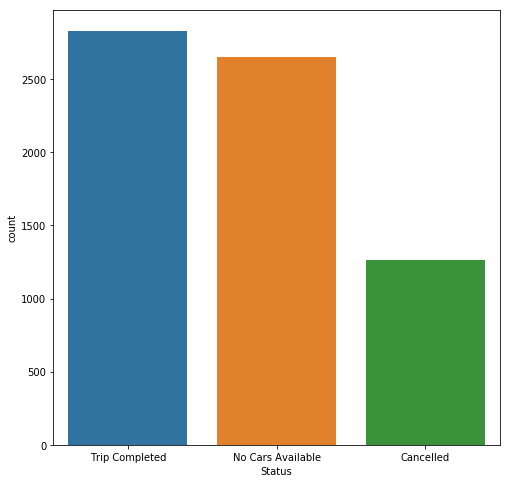

In [5]:
#Plotting number of requests in each status
plt.figure(figsize=(8, 8))
sns.countplot(x="Status",data=uber)
plt.show()

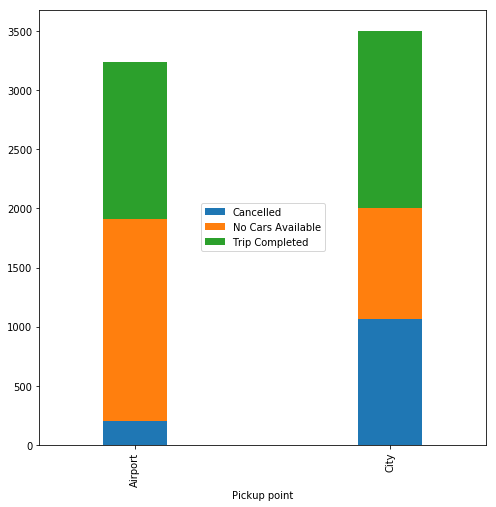

In [6]:
#Plotting the number of requests and status based on the pickup point
# Pivoting the data using pickup point
uber_pickup = uber.pivot_table(values='Request id', 
                      index='Pickup point',
                      columns='Status',
                      aggfunc='count')

uber_pickup.plot(kind='bar',stacked=True, width=0.25, figsize=(8, 8))
plt.legend(loc='center')

<Figure size 1152x576 with 0 Axes>

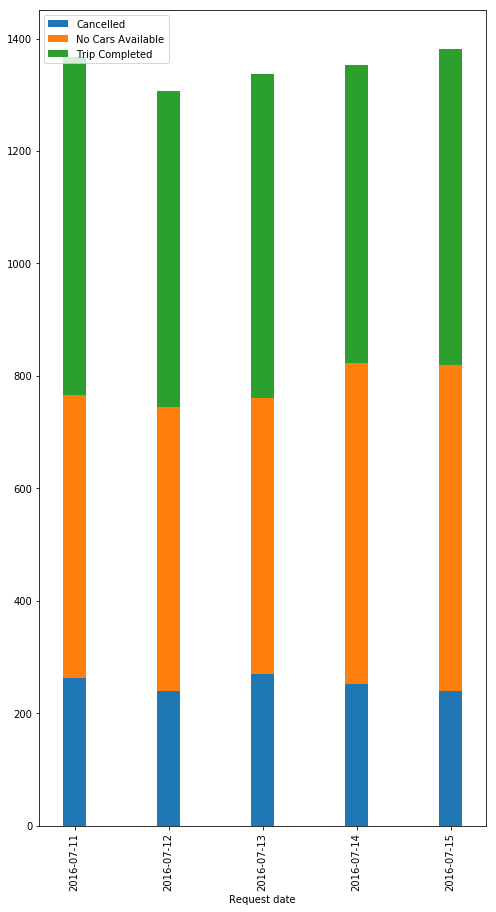

In [7]:
#Plotting the number of requests and status based on the request date

plt.figure(figsize=(16, 8))

# Pivoting the data using request date
uber_day = pd.pivot_table(uber, values='Request id', index='Request date', columns='Status', aggfunc='count')
uber_day.head()
uber_day.plot(kind='bar',stacked=True, width=0.25, figsize=(8, 15))
plt.legend(loc='upper left')


<Figure size 1152x576 with 0 Axes>

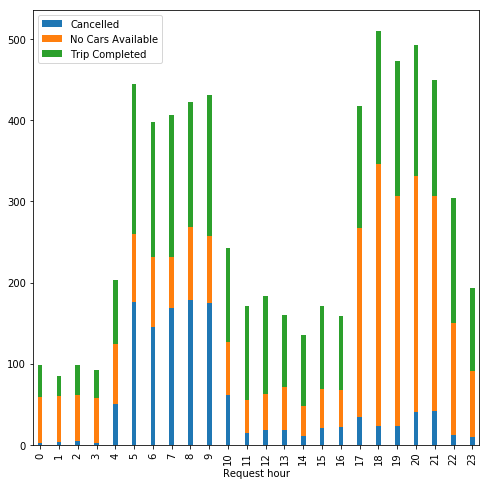

In [8]:
#Plotting the number of requests and status based on the request hour
plt.figure(figsize=(16, 8))

# Pivoting the data using request hour of the day 
uber_hour = pd.pivot_table(uber, values='Request id', index='Request hour', columns='Status', aggfunc='count')
uber_hour.head()
uber_hour.plot(kind='bar',stacked=True, width=0.25, figsize=(8, 8))
plt.legend(loc='upper left')


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


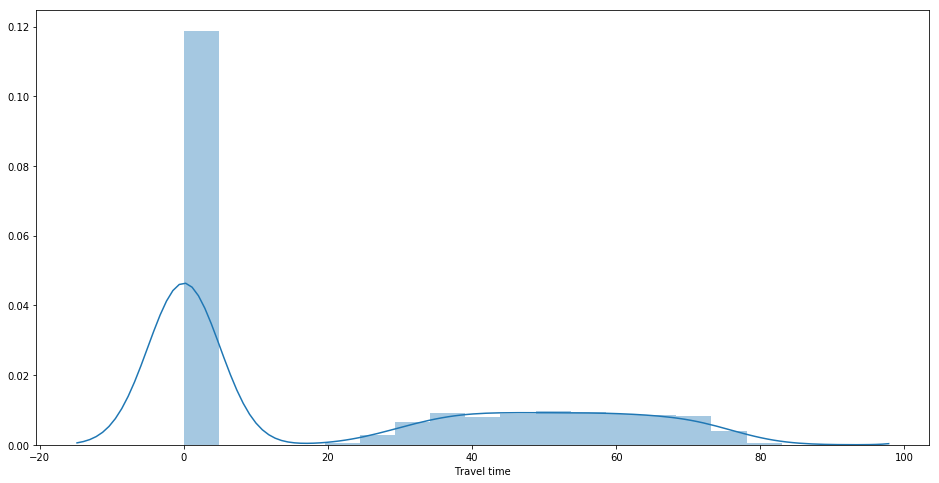

In [89]:
#Plotting the number of requests based on the travel duration
plt.figure(figsize=(16, 8))
sns.distplot(uber['Travel time'], hist=True)
plt.show()